In [6]:
import torch
import matplotlib.pyplot as plt
from blockulib.classess import play_games

class DataOrganizer():
    
    def __init__(self, ):
        pass
        
    def __call__(self, save_dir = "data/tensors/"):
        y_dict = torch.load(save_dir + "y.pth")
        y = y_dict['y']
        num_bins = int(y.max() + 1)
        
        self.diagram(y, bins = num_bins)
        y = self.transform(y)
        self.diagram(y, bins = num_bins)
        print(y.shape)
                          
        y_dict = {'y' : y}
        torch.save(y_dict, save_dir + "transformed_y.pth")
        
        
    def diagram(self, values, bins, dtype, save_dir = "data/diagrams/", show = False):
        plt.figure(figsize=(10, 6))
        plt.hist(values, bins=bins, edgecolor='black', alpha=0.7)
        plt.title('Distribution of Tensor Values')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        if show:
            plt.show()
        
    def transform(self, tensor, eps = 1e-6):
        tensor = torch.log(1 + tensor)
        mean_val = tensor.mean()
        std_val = tensor.std()
        return (tensor - mean_val) / (std_val + eps)

In [7]:
play_games(num_games = 5000, batch_size = 1000)

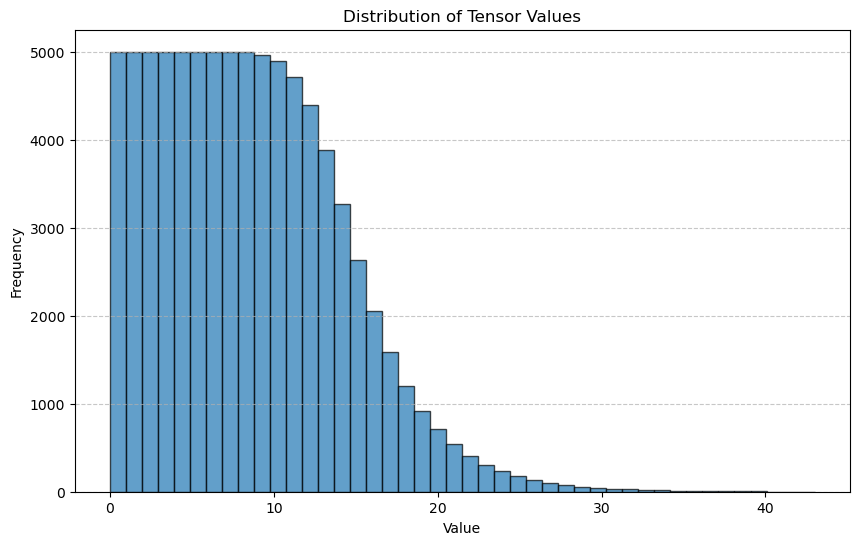

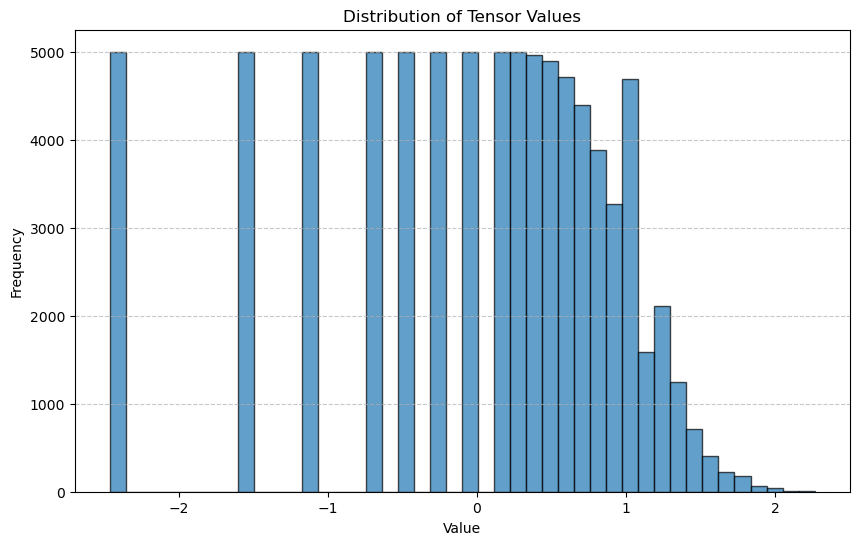

torch.Size([82396])


In [17]:
dorg = DataOrganizer()
dorg()